### Import Libraries

In [14]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [15]:
df = pd.read_csv('M810361.csv', header = None, dtype=str)

### Data Cleaning

In [16]:
# Remove rows with NaN values
df = df.dropna()

# Transpose the DataFrame
df = df.T

# Use the first row as the header
df.columns = df.iloc[0]

# Drop the first row
df = df[1:]

# Drop the last row (has na values)
df = df[:-1]

df.head()

,Data Series,Median Monthly Household Income From Work Including Employer CPF Contributions (Dollar),Real Change In Median Monthly Household Income From Work Including Employer CPF Contributions (Per Cent),Median Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) (Dollar),Real Change In Median Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) (Per Cent),Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) At 20th Percentile (Dollar),Real Change In Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) At 20th Percentile (Per Cent),Average Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) (Dollar),1st Decile (Lowest) (Dollar),2nd Decile (Dollar),...,7th Decile (Per Cent),8th Decile (Per Cent),9th Decile (Per Cent),10th Decile (Highest) (Per Cent),Gini Coefficient Based On Household Income From Work Per Household Member (Including Employer CPF Contributions) Before Accounting For Government Transfers And Taxes,Gini Coefficient Based On Equivalised Household Income From Work (Including Employer CPF Contributions) Before Accounting For Government Transfers And Taxes (Based On Modified OECD Scale),Gini Coefficient Based On Equivalised Household Income From Work (Including Employer CPF Contributions) Before Accounting For Government Transfers And Taxes (Based On Square Root Scale),Gini Coefficient Based On Household Income From Work Per Household Member (Including Employer CPF Contributions) After Accounting For Government Transfers And Taxes,Gini Coefficient Based On Equivalised Household Income From Work (Including Employer CPF Contributions) After Accounting For Government Transfers And Taxes (Based On Modified OECD Scale),Gini Coefficient Based On Equivalised Household Income From Work (Including Employer CPF Contributions) After Accounting For Government Transfers And Taxes (Based On Square Root Scale)
1,2022,10099,0.2,3287,2.6,1623,3.2,4478,689,1347,...,2.2,2.4,1.1,-1.3,0.437,0.415,0.398,0.378,0.357,0.337
2,2021,9520,1.5,3027,2.8,1498,5.5,4166,596,1224,...,2.3,1.4,0.6,-1.1,0.444,0.42,0.398,0.385,0.362,0.336
3,2020,9189,-2.4,2886,-1.2,1396,-1.3,4022,560,1141,...,-2.2,-2,-1.8,-2.3,0.452,0.431,0.415,0.375,0.354,0.335
4,2019,9425,1,2925,4.3,1415,3.8,4115,597,1179,...,5.6,4.6,3.5,0.4,0.452,0.431,0.411,0.398,0.377,0.353
5,2018,9293,2.6,2792,3,1359,3.4,3969,570,1124,...,3.2,4,4,2.3,0.458,0.435,0.412,0.403,0.38,0.354


In [17]:
df.dtypes

0
Data Series                                                                                                                                                                                    object
Median Monthly Household Income From Work Including Employer CPF Contributions (Dollar)                                                                                                        object
Real Change In Median Monthly Household Income From Work Including Employer CPF Contributions (Per Cent)                                                                                       object
Median Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) (Dollar)                                                                                 object
Real Change In Median Monthly Household Income From Work Per Household Member (Including Employer CPF Contributions) (Per Cent)                                                                object
Monthly 

### Extracting Columns

In [18]:
# select columns
household_income = df[['Data Series', 'Median Monthly Household Income From Work Including Employer CPF Contributions (Dollar)']]

# sort dataframe by year column
household_income = household_income.sort_values(by='Data Series')

# rename columns
household_income = household_income.rename(columns={'Median Monthly Household Income From Work Including Employer CPF Contributions (Dollar)': 'Median Monthly Household Income', 'Data Series': 'Year'})

# convert the "Year" column to datetime format
household_income['Year'] = pd.to_datetime(household_income['Year'], format='%Y')

# convert the "Income" column to integer format
household_income['Median Monthly Household Income'] = pd.to_numeric(household_income['Median Monthly Household Income'])

household_income.head()

,Year,Median Monthly Household Income
22,2001-01-01,4716
21,2002-01-01,4590
20,2003-01-01,4612
19,2004-01-01,4552
18,2005-01-01,4831


In [19]:
household_income.dtypes

0
Year                               datetime64[ns]
Median Monthly Household Income             int64
dtype: object

### Plot Yearly Data

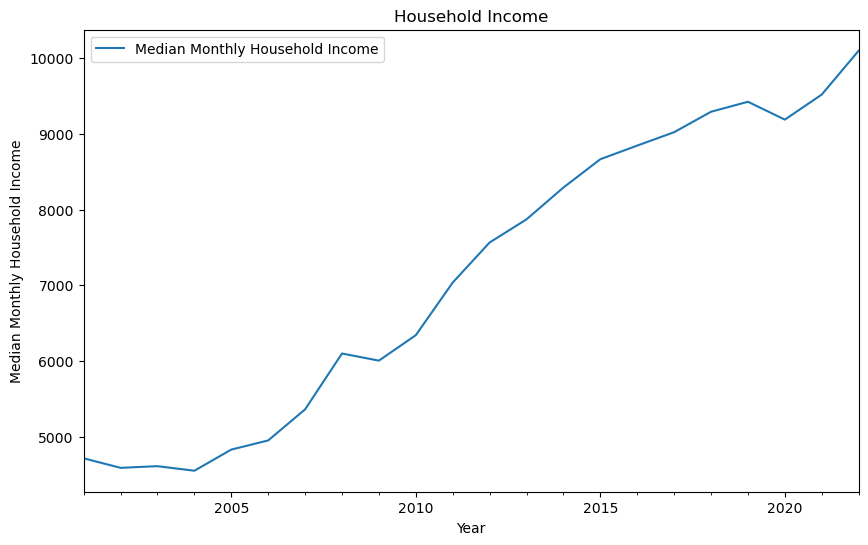

In [20]:
# Plot the data
household_income.plot(x='Year', y='Median Monthly Household Income', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Median Monthly Household Income')
plt.title('Household Income')

# Show the plot
plt.show()

### Exporting Data

In [26]:
# Export yearly data to CSV
household_income.to_csv('Cleaned Data/Median Monthly Household Income.csv')